In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("dds_datasets/dds_ch2_nyt/nyt1.csv")
df.shape

(458441, 5)

In [3]:
df.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Age          458441 non-null  int64
 1   Gender       458441 non-null  int64
 2   Impressions  458441 non-null  int64
 3   Clicks       458441 non-null  int64
 4   Signed_In    458441 non-null  int64
dtypes: int64(5)
memory usage: 17.5 MB


In [5]:
df.isnull().sum()

Age            0
Gender         0
Impressions    0
Clicks         0
Signed_In      0
dtype: int64

In [6]:
df.duplicated().sum()

453503

In [7]:
df.columns = [col.lower() for col in df]
df

,age,gender,impressions,clicks,signed_in
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458436,0,0,2,0,0
458437,0,0,4,0,0
458438,72,1,5,0,1
458439,0,0,5,0,0


In [8]:
df.describe()

,age,gender,impressions,clicks,signed_in
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000


In [9]:
bins = [0, 18, 25, 35, 45, 55, 65, 110]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df.age, bins, labels = labels, include_lowest = True)
df

,age,gender,impressions,clicks,signed_in,age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
458436,0,0,2,0,0,<18
458437,0,0,4,0,0,<18
458438,72,1,5,0,1,65+
458439,0,0,5,0,0,<18


<AxesSubplot: xlabel='age_group', ylabel='count'>

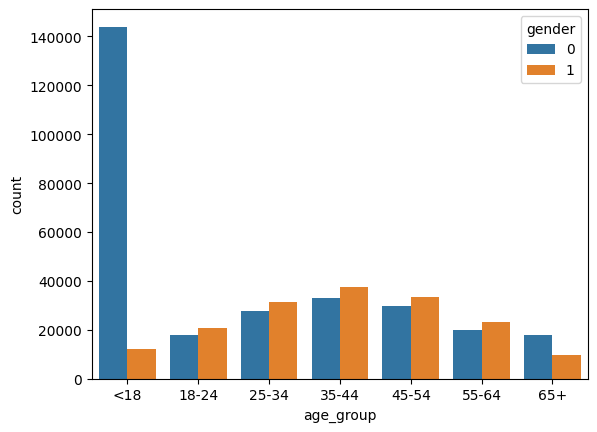

In [10]:
sns.countplot(x='age_group', hue='gender', data=df)

<AxesSubplot: xlabel='clicks', ylabel='count'>

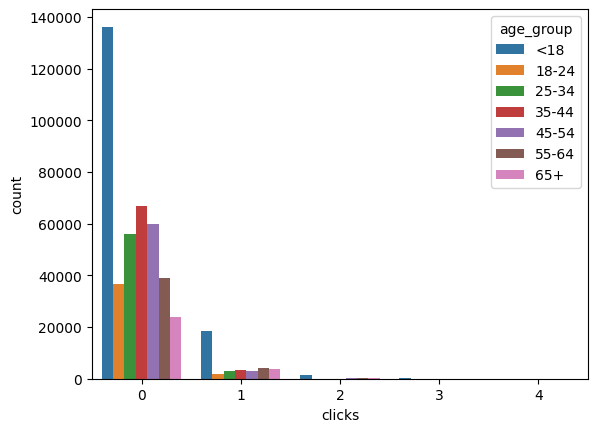

In [11]:
sns.countplot(x='clicks', hue='age_group', data=df)

In [12]:
df[(df['clicks']>0) & (df['impressions']==0)]

,age,gender,impressions,clicks,signed_in,age_group


<AxesSubplot: xlabel='impressions', ylabel='Count'>

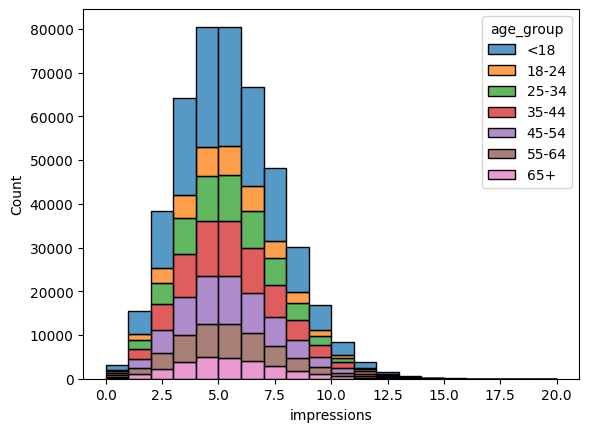

In [13]:
sns.histplot(df, x='impressions', hue='age_group', stat='count', binwidth=1, multiple='stack')

<AxesSubplot: xlabel='age_group', ylabel='impressions'>

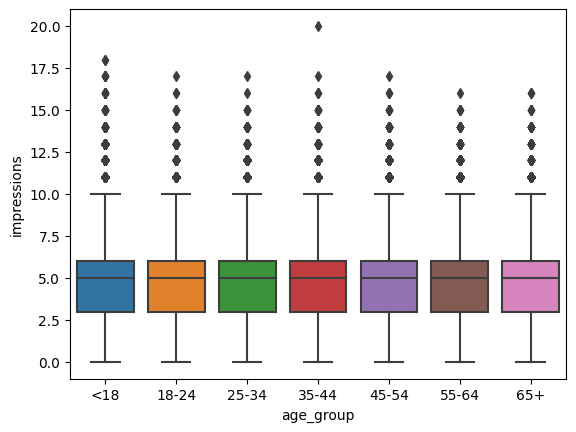

In [14]:
sns.boxplot(y=df['impressions'], x=df['age_group'])

In [15]:
df['CTR'] = round(df['clicks']/df['impressions'], 5)

<AxesSubplot: xlabel='age_group', ylabel='CTR'>

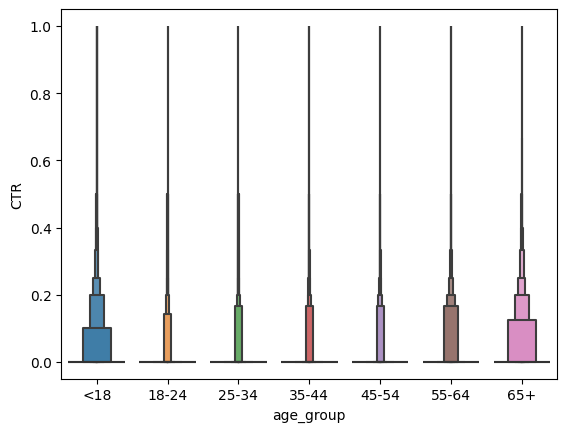

In [16]:
sns.boxenplot(x=df['age_group'], y = df['CTR'])

In [18]:
bins = [-1, 0, 0.1, 0.2, 0.4, 1]
labels = ['0', '<10%', '10%-20%', '20%-40%', '>40%']
df['CTR_group'] = pd.cut(df.CTR, bins, labels = labels)
df.CTR_group.value_counts(normalize=True, sort=True)

0          0.912516
10%-20%    0.054654
20%-40%    0.023328
<10%       0.004996
>40%       0.004506
Name: CTR_group, dtype: float64

In [19]:
df_Clicked = df[df['CTR'] > 0]
df_Clicked.head()

,age,gender,impressions,clicks,signed_in,age_group,CTR,CTR_group
5,47,0,11,1,1,45-54,0.09091,<10%
6,0,0,7,1,0,<18,0.14286,10%-20%
10,0,0,8,1,0,<18,0.12500,10%-20%
39,0,0,7,2,0,<18,0.28571,20%-40%
63,0,0,2,1,0,<18,0.50000,>40%


In [20]:
df_Clicked.shape

(39838, 8)

In [21]:
df_Clicked.age_group.value_counts(normalize=True)

<18      0.505723
55-64    0.106757
65+      0.099152
35-44    0.090190
45-54    0.079397
25-34    0.073297
18-24    0.045484
Name: age_group, dtype: float64

<AxesSubplot: xlabel='age_group', ylabel='CTR'>

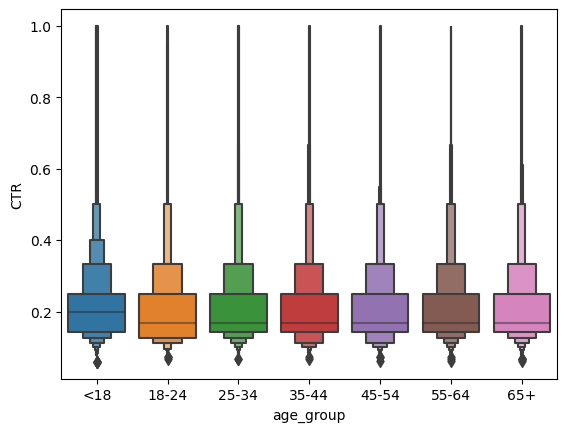

In [22]:
sns.boxenplot(x = df_Clicked['age_group'], y = df_Clicked['CTR'])

<AxesSubplot: xlabel='age_group', ylabel='count'>

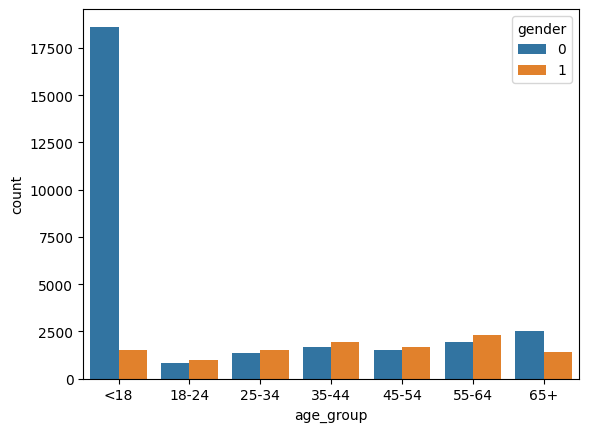

In [23]:
sns.countplot(x='age_group', hue='gender', data=df_Clicked)

<AxesSubplot: xlabel='age_group', ylabel='count'>

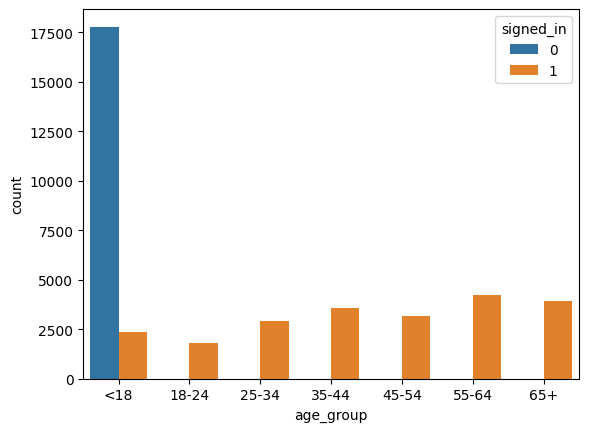

In [24]:
sns.countplot(x='age_group', hue='signed_in', data=df_Clicked)